In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


import seaborn as sns
sns.set()

In [2]:
# all paths and important links here
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [4]:
# ALL STABLE FUNCTIONS HERE

#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [5]:
#load downloaded data
data = load_data(2021)

In [6]:
data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49792,3546,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49793,3563,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.444560,NaN,NaN,NaN,NaN,NaN,0.599282,-59.928155
49794,3584,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49795,3601,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.711415,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# find data of a specific game and return a copy
def get_data(game_id, main_df):
    return main_df[main_df['game_id'] ==game_id].copy()
    
# data processing: drop na values for relevant columns
#drop na vals in play_type

#plot game progress
def plot_game_wp(df, return_area=True):
#     plt.ylim(-.52, 0.52) 
    plt.ylim(-.02, 1.02)
    y_range = np.round((np.arange(11)/10), 1)
    plt.yticks(y_range, y_range)
#     plt.plot(range(df.shape[0]), df.home_wp-0.5)
    plt.plot(range(df.shape[0]), df.home_wp)
    if return_area:
        return calc_area(df)
    
#calculate and return normalized absolute probability area under curve for each team
def calc_area(df, home_team, away_team):
    home_team_area = np.trapz(df.home_wp) / np.trapz(df.home_wp*0+1) # maximum curve of 1
    away_team_area = 1 - home_team_area
    return {home_team:home_team_area, away_team:away_team_area}

def process_game(game_id, main_df=data, plot=True):
    game_df = get_data(game_id, main_df)
#     game_df = game_df[game_df.play_type.notnull()]
    home_team = game_df['home_team'].iloc[0]
    away_team = game_df['away_team'].iloc[0]
    if plot:
        plot_game_wp(game_df, False)
#     areas = calc_area(game_df, home_team, away_team)
#     return areas
    return calc_area(game_df, home_team, away_team)

{'DAL': 0.1956458002272341, 'SF': 0.8043541997727659}

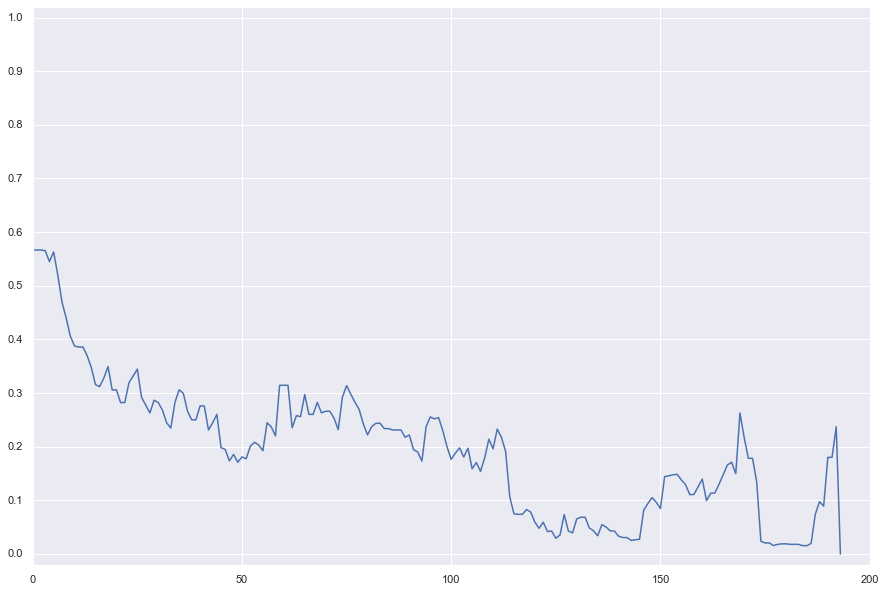

In [17]:
df = get_data('2021_19_SF_DAL', data)
df.home_wp[-10:]
# plot_game_wp(df, False)
process_game('2021_19_SF_DAL')